<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/strange_attractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pysces

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00


In [3]:
from google.colab import output
output.enable_custom_widget_manager()

import pysces
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Oscillations in 3 dimensions

We will now work on an oscillatory model that contains 3 variables: $S$, $P_1$ and $P_2$. This is similar to the oscillatory model you worked on in the previous workgroup, but a simple change from 2 to 3 variables will make this model a lot more interesting, as you will see.

The model description follows, and can originally be found on this paper: https://doi.org/10.1073/pnas.79.22.6917

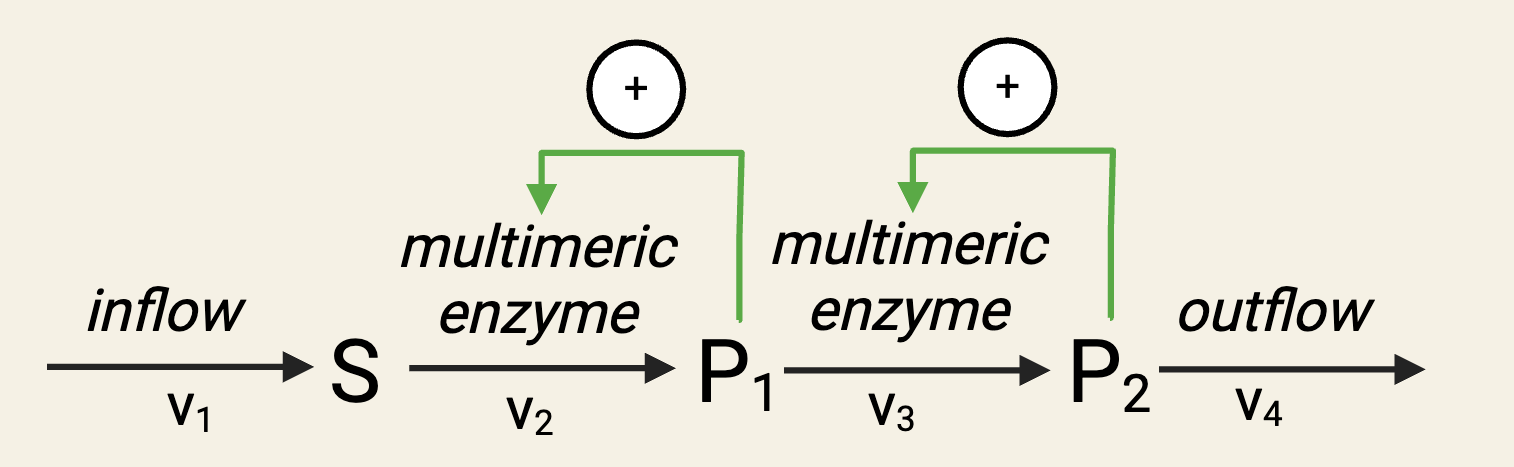

Mass balances:
$$
\begin{align}
\frac{ds}{dt} &= v_1 - v_2 \\
\frac{dp_1}{dt} &= n_2\cdot v_2 - v_3 \\
\frac{dp_2}{dt} &= n_3\cdot  v_3 - v_4 \\
\end{align}
$$

Rate equations:
$$
\begin{align}
v_1 &= k_1 \\
v_2 &= V_2\frac{s(1+s)(1+p_1)^2}{(1+ s)^2(1+p_1)^2 + L_2} \\
v_2 &= V_3\frac{p_1(1+d\cdot p_1)(1+p_2)^2}{(1+d\cdot p_1)^2(1+p_2)^2 + L_3} \\
v_4 &= k_4 \cdot p_2
\end{align}
$$

Parameters:
$$
\begin{align}
n_2 &=50 \\
n_3 &=0.02 \\
k_1 &= 0.45\\
L_2 &= 5\cdot 10^8 \\
L_3 &= 100 \\
V_2 &= 10 \\
V_3 &= 10 \\
d &= 0 \\
k_4 &\in [0,15]
\end{align}
$$



# Exercise
You will simulate this model in python (using PySCeS or not, your choice).

1. Implement the model and simulated it. Try to recreate Figure 4 in the paper. Plots on that figure are done using $k_4 = 2$ and $k_4 = 2.032$ respectively, with the simulation time $t \in [0,5000]$, use a suitable amount of evaluation points.
  * You can use $s_0 = 29.19988$, $p_{1,0} = 188.8$, $p_{2,0} = 0.3367$ to get the exact same plot.


2. Investigate the table below for other values of $k_4$. Can you reproduce all the observed behaviours? You might need to test multiple starting conditions to confirm.

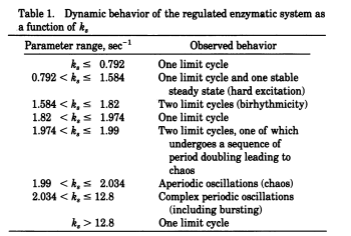

In [40]:
model_description = '''

r1:
$pool = s
k1

r2:
s = {50}p1
V2*(s*(1+s)*(1+p1)**2)/((1+s)**2*(1+p1)**2+L2)

r3:
p1 = {0.02}p2
V3*(p1*(1+d*p1)*(1+p2)**2)/((1+d*p1)**2*(1+p2)**2+L3)

r4:
p2 = $pool
k4*p2

#parameters
n2 = 50
n3 = 0.02
k1 = 0.45
L2 = 5e8
L3 = 100
V2 = 10
V3 = 10
d = 0
k4 = 2

#initial concentrations
s = 29.19988
p1 = 188.8
p2 = 0.3367

'''

Assuming extension is .psc
Using model directory: /root/Pysces/psc
Using file: my_model.psc
/root/Pysces/psc/orca/my_model.psc loading ..... 
Parsing file: /root/Pysces/psc/orca/my_model.psc
Info: No reagents have been fixed
Info: "n2" has been initialised but does not occur in a rate equation
Info: "n3" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 


/usr/local/lib/python3.11/dist-packages/pysces/PyscesModel.py:4058: ODEintWarning: Integration successful.
  sim_res, infodict = scipy.integrate.odeint(


LSODA time for 100000 points: 1.9061660766601562


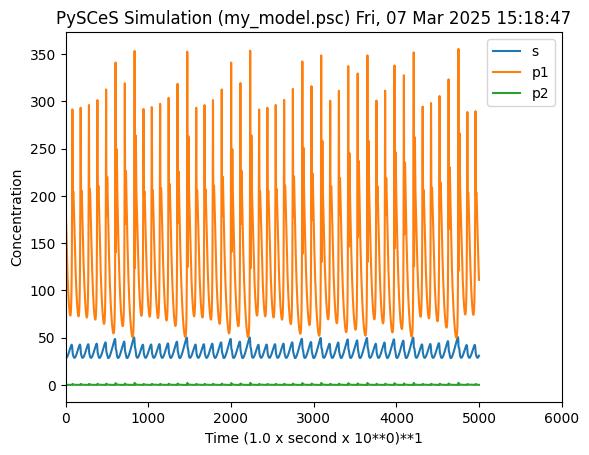

In [41]:
model = pysces.model('my_model', loader='string', fString=model_description)
model.doSim(end=5000, points = 100000)
model.SimPlot()

In [42]:
species, labels = model.data_sim.getSpecies(lbls=True)
result = pd.DataFrame(species, columns=[labels])
result

,Time,s,p1,p2
0,0.000000,29.199880,188.800000,0.336700
1,0.050001,29.192603,188.633127,0.336171
2,0.100001,29.185389,188.465867,0.335640
3,0.150002,29.178237,188.298229,0.335107
4,0.200002,29.171148,188.130224,0.334572
...,...,...,...,...
99995,4999.799998,30.931711,111.663200,0.147045
99996,4999.849998,30.941999,111.549273,0.146841
99997,4999.899999,30.952303,111.435526,0.146639
99998,4999.949999,30.962623,111.321956,0.146436


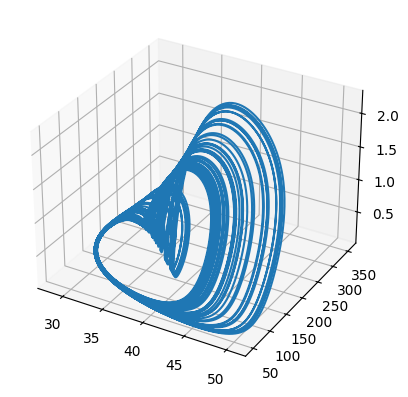

In [43]:
#useful ploting function:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(result['s'],result['p1'],result['p2'])